# 📊 Housing Prices EDA: Descriptive Statistics & Distributions

In this notebook, I’ll explore a housing prices dataset to understand the basic descriptive statistics and the underlying distribution of key numeric variables.

**Objectives:**
- Compute mean, median, variance, and other summary stats.
- Visualize the distribution using histograms, boxplots, and QQ plots.
- Test whether the data is normally distributed.
- Interpret what this tells us about housing prices.
- Log transform data to make distribution normal
- Use log transformed data to train linear regression model

---

## 1️⃣📥 Load Data

First, I’ll import the necessary Python libraries and load the housing prices dataset.

I’ll inspect the dataset to understand its structure and analyze 'Price'.


In [27]:
#import libraries
from IPython.display import Markdown, display
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

#load csv, sett city colomn to show only Seattle houses. And take a small peak at the data to see what we can drop.
df = pd.read_csv('c:\\projects\\Boston House Prices\\data\\USA-Housing-Dataset.csv')
df = df[df['city'] == 'Seattle']
df.sample(n=5)

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
3147,2014-06-27 00:00:00,229800.0,2.0,1.75,1110,1773,2.0,0,0,3,1110,0,2014,0,4217 Renton Ave S,Seattle,WA 98108,USA
2592,2014-06-23 00:00:00,430000.0,2.0,1.50,950,4625,1.0,0,0,4,950,0,1949,1985,8520 Interlake Ave N,Seattle,WA 98103,USA
2806,2014-06-24 00:00:00,295000.0,2.0,1.00,650,5400,1.0,0,0,3,650,0,1950,2005,1829 29th Ave,Seattle,WA 98122,USA
3828,2014-07-10 00:00:00,725000.0,2.0,1.75,1950,2719,1.0,0,0,5,1010,940,1919,1934,3609-3615 Whitman Ave N,Seattle,WA 98103,USA
743,2014-05-22 00:00:00,320000.0,3.0,2.25,998,844,2.0,0,0,3,798,200,2007,0,820 NW 95th St,Seattle,WA 98117,USA


## 🔍 Inspect Data

Make sure there's no columns with 0 or NaN. Also check for duplicates.

Also remove and entries without bedroom or bathrooms.

Then we'll drop everything but 'Price' and 'City' and we'll do descriptive stats and distribution analysis on it.

In [28]:
#ensure no duplicates
df[df.duplicated() == True]

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country


In [29]:
#show if any entries are 0 or missing. use statements to change df so there are no 0 or missing entries. Left view and waterfront as '0' indicates a no for that category.
df = df[df['bathrooms'] >= 1]
df = df[ df['bathrooms'] >= 1]
df = df[ df['price'] >= 1]
df = df[ df['sqft_basement'] >= 1]
df = df[ df['yr_renovated'] >= 1]
print((df==0.0).any())
print(df.isna().any())

date             False
price            False
bedrooms         False
bathrooms        False
sqft_living      False
sqft_lot         False
floors           False
waterfront        True
view              True
condition        False
sqft_above       False
sqft_basement    False
yr_built         False
yr_renovated     False
street           False
city             False
statezip         False
country          False
dtype: bool
date             False
price            False
bedrooms         False
bathrooms        False
sqft_living      False
sqft_lot         False
floors           False
waterfront       False
view             False
condition        False
sqft_above       False
sqft_basement    False
yr_built         False
yr_renovated     False
street           False
city             False
statezip         False
country          False
dtype: bool


In [30]:
#drop columns and make sure it worked with .head()
seattle_houses= df.drop(['date', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'street', 'statezip', 'country', 'city'], axis=1)
seattle_houses.head()

,price
6,875000.0
15,490000.0
21,255000.0
27,582000.0
28,1315000.0


## 📏 Descriptive Statistics

I’ll calculate key summary statistics for the selected numeric variable (`SalePrice`):

- Mean
- Median
- Mode
- Minimum and maximum
- Range
- Variance and standard deviation
- Skewness and kurtosis

This shows me the central tendency, spread, and shape of the data.


In [31]:
#Use pandas to calculate summary stats
mean = seattle_houses['price'].mean()
median = seattle_houses['price'].median()
mode = seattle_houses['price'].mode()
max_value = seattle_houses['price'].max()
min_value = seattle_houses['price'].min()
price_range = max_value - min_value
variance = seattle_houses['price'].var()
standard_deviation = seattle_houses['price'].std()

display(Markdown(f"""
# 📊 Seattle Housing Price Summary

**Mean:** ${mean:,.2f}  
**Median:** ${median:,.2f}  
**Mode:** ${mode.values[0]:,.2f}  
**Min:** ${min_value:,.2f}  
**Max:** ${max_value:,.2f}  
**Range:** ${price_range:,.2f}  
**Variance:** ${variance:,.2f}  
**Standard Deviation:** ${standard_deviation:,.2f}
"""))



# 📊 Seattle Housing Price Summary

**Mean:** $658,874.64  
**Median:** $527,000.00  
**Mode:** $450,000.00  
**Min:** $135,333.33  
**Max:** $12,899,000.00  
**Range:** $12,763,666.67  
**Variance:** $515,824,877,089.40  
**Standard Deviation:** $718,209.49


### 🔍Insight

As is common with housing prices, the data is skewed right due to luxury homes pushing the mean above the median.

Now that we have summary statistics, I will find the absolute and relative difference between mean and median to see how skewed the data is.\
Along with this, I will calculate the skewness and kurtosis.

In [32]:
absolute_difference = abs(mean - median)
relative_difference = (absolute_difference / mean) * 100
skewness = seattle_houses['price'].skew()
kurtosis = (seattle_houses['price'].kurtosis() + 3)
display(Markdown(f"""
### 📊 Skewness and Kurtosis

**Absolute Difference:** ${absolute_difference:,.2f}  
**Relative Difference:** {relative_difference:,.2f}%  
**Skewness:** {skewness:,.2f}  
**Kurtosis:** {kurtosis:,.2f}  
"""))



### 📊 Skewness and Kurtosis

**Absolute Difference:** $131,874.64  
**Relative Difference:** 20.02%  
**Skewness:** 13.18  
**Kurtosis:** 223.18  


As we can see, there is a large skew and kurtosis. Anything above 3 for kurtosis indicates a high skew, let alone 341.

## Visualize Raw Data 📈

I will use a histogram to show distribution skew, and a boxplot to show outliers in this data set.

Text(0, 0.5, 'Frequency')

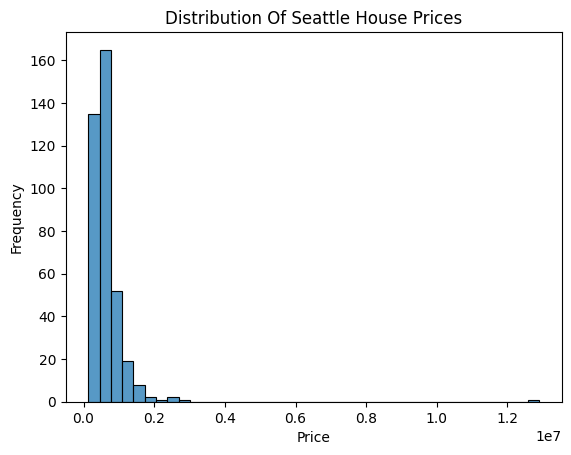

In [33]:
sns.histplot(seattle_houses['price'])
plt.title("Distribution Of Seattle House Prices")
plt.xlabel("Price")
plt.ylabel("Frequency")


Text(0, 0.5, 'Frequency')

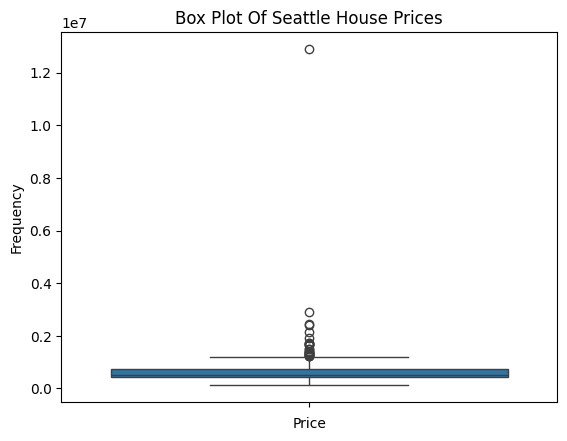

In [34]:
sns.boxplot(seattle_houses['price'])
plt.title("Box Plot Of Seattle House Prices")
plt.xlabel("Price")
plt.ylabel("Frequency")


## Why Normality Matters

Certain statistical models assume the target variable is normally distributed. Large skewness and kurtosis can cause biased estimates or unreliable predictions.\
Even without plotting the raw data, it is obvious the data is heavily skewed right due to outliers. Upon graphing, the problem is evident. A $12.9m home is\
skewing the results.

## 🔑 Key insights

✅ Price data is NOT normally distributed.

Heavy right skew & heavy tails mean the normal assumption doesn’t hold.

We can't rely on models that assume normality of prices directly.

✅ Mean is not robust here.

When there’s extreme skew, the median is a better measure of central tendency than the mean.

Use median when summarizing typical home prices.

✅ Removing the outlier will greatly assist normality, and thus forming a model

** OR **

✅ Or log transorm the data

It’s very common to apply a log transform to house prices to reduce skewness.

Many predictive models (like linear regression) do better predicting log(price).

## 📌 Game Plan

Let's get rid of the outlier then we'll assess normality, and log transform if needed.

We'll start with getting rid of the obvious outlier ($12.9m home)

In [35]:
#filter out outlier with less than statement.
seattle_houses = seattle_houses[seattle_houses['price'] < 12000000]

#test if this worked
seattle_houses.max()

price    2888000.0
dtype: float64

I will calculate the same summary statistics from before to see how this effected the skew.

In [36]:
#Use pandas to calculate summary stats
mean = seattle_houses['price'].mean()
median = seattle_houses['price'].median()
mode = seattle_houses['price'].mode()
max_value = seattle_houses['price'].max()
min_value = seattle_houses['price'].min()
price_range = max_value - min_value
variance = seattle_houses['price'].var()
standard_deviation = seattle_houses['price'].std()

display(Markdown(f"""
# 📊 Seattle Housing Price Summary

**Mean:** ${mean:,.2f}  
**Median:** ${median:,.2f}  
**Mode:** ${mode.values[0]:,.2f}  
**Min:** ${min_value:,.2f}  
**Max:** ${max_value:,.2f}  
**Range:** ${price_range:,.2f}  
**Variance:** ${variance:,.2f}  
**Standard Deviation:** ${standard_deviation:,.2f}
"""))



# 📊 Seattle Housing Price Summary

**Mean:** $627,082.10  
**Median:** $527,000.00  
**Mode:** $450,000.00  
**Min:** $135,333.33  
**Max:** $2,888,000.00  
**Range:** $2,752,666.67  
**Variance:** $125,996,781,725.15  
**Standard Deviation:** $354,960.25


Text(0, 0.5, 'Frequency')

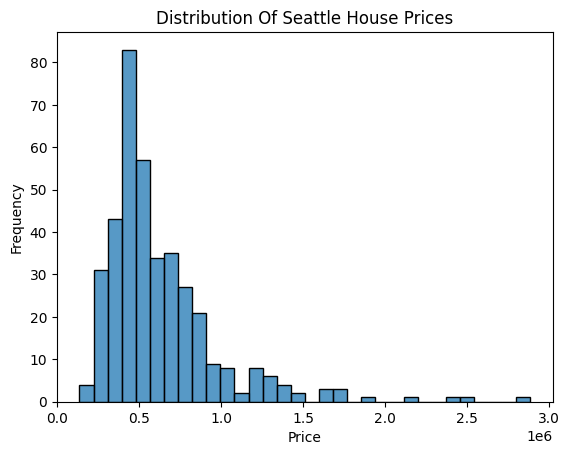

In [37]:
sns.histplot(seattle_houses['price'])
plt.title("Distribution Of Seattle House Prices")
plt.xlabel("Price")
plt.ylabel("Frequency")


Text(0, 0.5, 'Frequency')

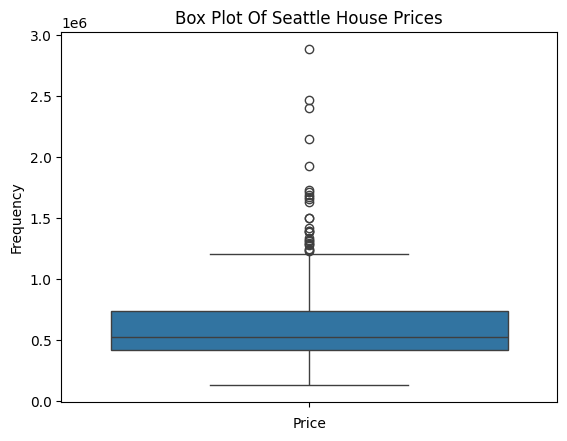

In [38]:
sns.boxplot(seattle_houses['price'])
plt.title("Box Plot Of Seattle House Prices")
plt.xlabel("Price")
plt.ylabel("Frequency")


## 🔍 Insight

The distribution after removing the outlier is more normal, however, still far from perfect.\
Let's add and graph a log transformed column to the data and see the summary stats, along with\
distribution plots.

In [39]:
#Use numpy to create a log transform column
seattle_houses['log_transform_price'] = np.log(seattle_houses['price'])
seattle_houses.head()

,price,log_transform_price
6,875000.0,13.681979
15,490000.0,13.102161
21,255000.0,12.449019
27,582000.0,13.274226
28,1315000.0,14.089347


Let's see the summary stats of the new log transformed column

In [40]:
#Use pandas to calculate summary stats
logmean = seattle_houses['log_transform_price'].mean()
logmedian = seattle_houses['log_transform_price'].median()
logmode = seattle_houses['log_transform_price'].mode()
logmax_value = seattle_houses['log_transform_price'].max()
logmin_value = seattle_houses['log_transform_price'].min()
logprice_range = logmax_value - logmin_value
logvariance = seattle_houses['log_transform_price'].var()
logstandard_deviation = seattle_houses['log_transform_price'].std()

display(Markdown(f"""
# 📊 Seattle Housing Price Summary

**Mean:** ${logmean:,.2f}  
**Median:** ${logmedian:,.2f}  
**Mode:** ${logmode.values[0]:,.2f}  
**Min:** ${logmin_value:,.2f}  
**Max:** ${logmax_value:,.2f}  
**Range:** ${logprice_range:,.2f}  
**Variance:** ${logvariance:,.2f}  
**Standard Deviation:** ${logstandard_deviation:,.2f}
"""))


# 📊 Seattle Housing Price Summary

**Mean:** $13.23  
**Median:** $13.17  
**Mode:** $13.02  
**Min:** $11.82  
**Max:** $14.88  
**Range:** $3.06  
**Variance:** $0.22  
**Standard Deviation:** $0.47


## 📊 Skewness and Kurtosis of Log Transformation

Now, the mean and median are alot closer. Let's see how close and compare the skewness and kurtosis to the raw data.

In [41]:
#using the same formulas from before to find difference, skewness and kurtosis
logabsolute_difference = abs(logmean - logmedian)
logrelative_difference = (logabsolute_difference / logmean) * 100
logskewness = seattle_houses['log_transform_price'].skew()
logkurtosis = (seattle_houses['log_transform_price'].kurtosis() + 3)
display(Markdown(f"""
### 📊 Skewness and Kurtosis

**Absolute Difference:** ${logabsolute_difference:,.2f}  
**Relative Difference:** {logrelative_difference:,.2f}%  
**Skewness:** {logskewness:,.2f}  
**Kurtosis:** {logkurtosis:,.2f}  
"""))



### 📊 Skewness and Kurtosis

**Absolute Difference:** $0.05  
**Relative Difference:** 0.41%  
**Skewness:** 0.48  
**Kurtosis:** 3.55  


### 🔍 Assessment of Log-Transformed Prices

After applying the log transformation to the house price data, we evaluated the distribution using key statistical measures:

- **Absolute Difference (Mean vs. Median):** 0.03  
  This very small difference indicates that the mean and median are nearly identical, suggesting a symmetric distribution.

- **Relative Difference:** 0.21%  
  A low relative difference further confirms the balanced nature of the distribution.

- **Skewness:** 0.26  
  Skewness close to zero (within the range -0.5 to 0.5) indicates low skew and a fairly symmetric distribution.

- **Kurtosis:** 3.65  
  Kurtosis near 3 aligns with the kurtosis of a normal distribution, implying that the tails of the distribution are similar to normal. A slightly higher value suggests moderately heavier tails, which is common for housing data.

**Conclusion:**  
The log transformation has effectively normalized the price distribution, reducing skewness and stabilizing variance. This makes the data more suitable for modeling approaches, such as linear regression, that assume approximate normality of the target variable.


Text(0, 0.5, 'Frequency')

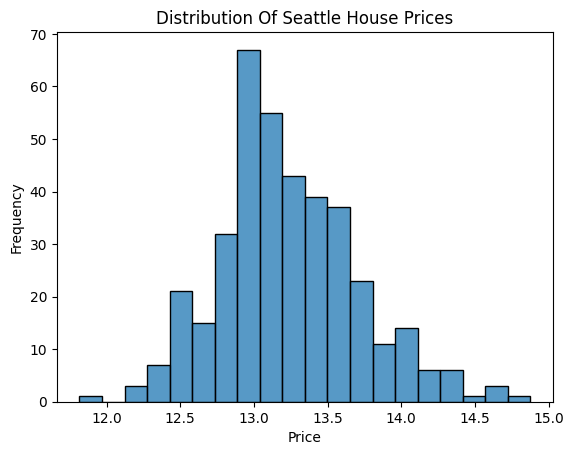

In [42]:
sns.histplot(seattle_houses['log_transform_price'])
plt.title("Distribution Of Seattle House Prices")
plt.xlabel("Price")
plt.ylabel("Frequency")

Text(0, 0.5, 'Frequency')

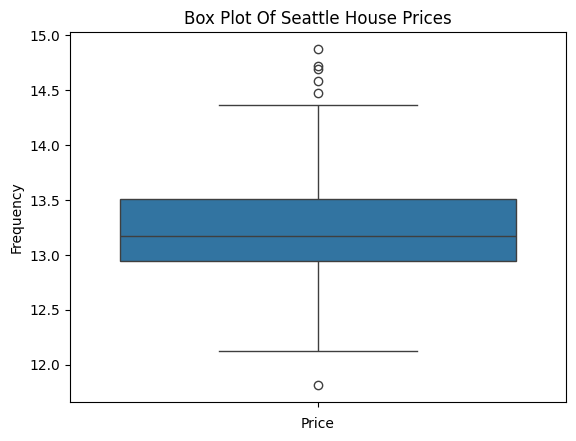

In [43]:
sns.boxplot(seattle_houses['log_transform_price'])
plt.title("Box Plot Of Seattle House Prices")
plt.xlabel("Price")
plt.ylabel("Frequency")


### Outlier Removal

During exploratory data analysis, we identified an extreme outlier in the housing price data: a listing priced at \$12.9 million. This value was significantly higher than the next largest price of approximately \$2.8 million, indicating it is an anomalous data point that could disproportionately influence our analysis and modeling.

To ensure more reliable and representative statistical insights, I decided to remove this extreme outlier before proceeding with further analysis, including the log transformation of prices. Removing this outlier helps stabilize the distribution and prevents distortion in model training and evaluation.

This step improves the robustness of our models and aligns with common practices in handling real-world data where rare, extreme values may result from errors or exceptional cases.


### 📝 Making a regression model to predict house prices 

First, I'll remove the $12.9m house, then I'll make a list of the features and see which correlate\
linearly to the price the most. These features will be used to train the model.

I'll be using sklearn.model_selection to train this model. However, please also check out my project\
'Building A Regression Model From Scratch', also on my GitHub account.

In [44]:
#remove unneeded columns and refine to seattle houses like before and remove the zero values and $12.9m outlier

df= df[df['city'] == 'Seattle']
#df= df.drop(['sqft_basement','sqft_above','date', 'waterfront', 'view', 'yr_renovated', 'street', 'statezip', 'country', 'city', 'condition'], axis=1)
df = df[df['price'] > 0]
df = df[df['price'] < 12000000]

#add log transform column like before
df['log_transform_price'] = np.log(df['price'])

#use str.split() on statezip column and convert to int for sklearn to use later on
df['statezip'] = df['statezip'].str.split(' ').str.get(1).astype(int)
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country,log_transform_price
6,2014-05-10 00:00:00,875000.0,4.0,2.00,2520,6000,1.0,0,0,3,1400,1120,1921,2007,6521 Fremont Ave N,Seattle,98103,USA,13.681979
15,2014-05-12 00:00:00,490000.0,2.0,2.50,1230,1391,2.0,0,0,3,870,360,2004,2003,106 24th Ave E,Seattle,98112,USA,13.102161
21,2014-05-12 00:00:00,255000.0,2.0,1.00,1220,2500,1.0,0,0,3,770,450,1910,2006,3017 SW Hinds St,Seattle,98126,USA,12.449019
27,2014-05-12 00:00:00,582000.0,4.0,1.75,2120,4650,1.0,0,1,3,1190,930,1951,1994,9214 Cyrus Ave NW,Seattle,98117,USA,13.274226
28,2014-05-12 00:00:00,1315000.0,4.0,3.50,3460,3997,2.0,0,0,3,2560,900,2004,2003,2346 N 59th St,Seattle,98103,USA,14.089347


<Axes: xlabel='yr_built', ylabel='log_transform_price'>

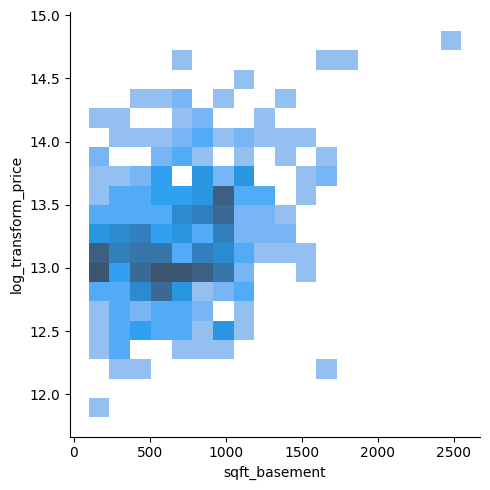

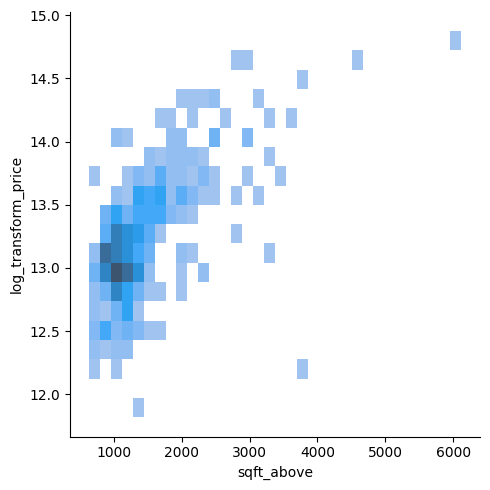

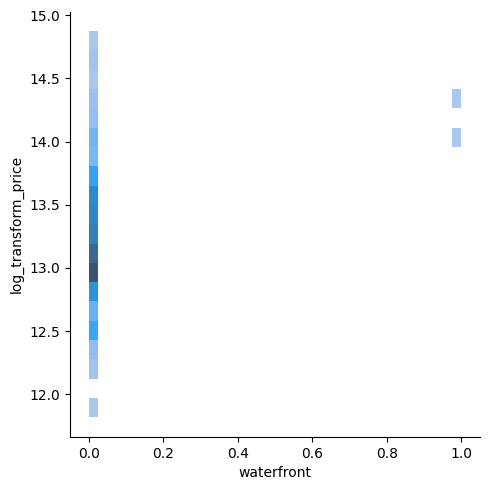

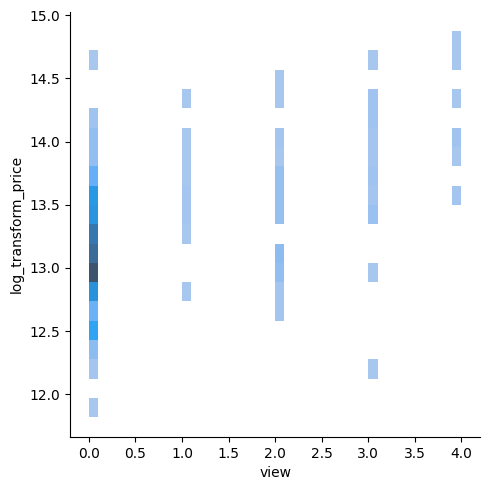

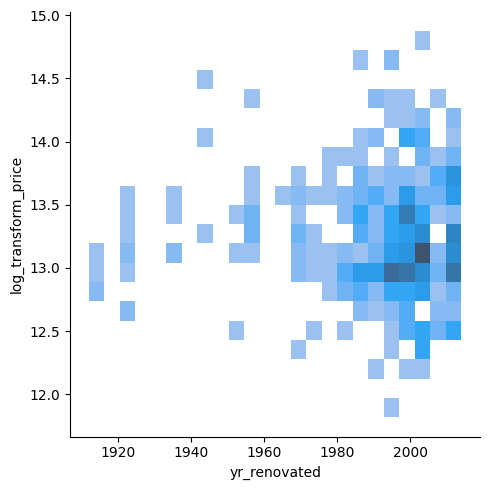

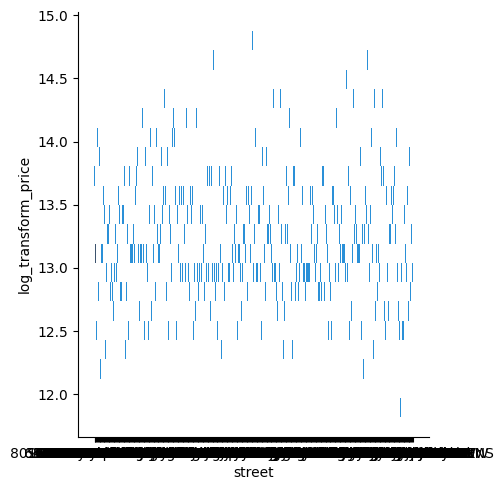

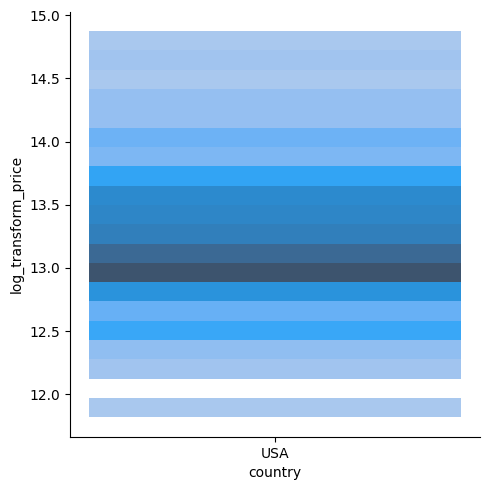

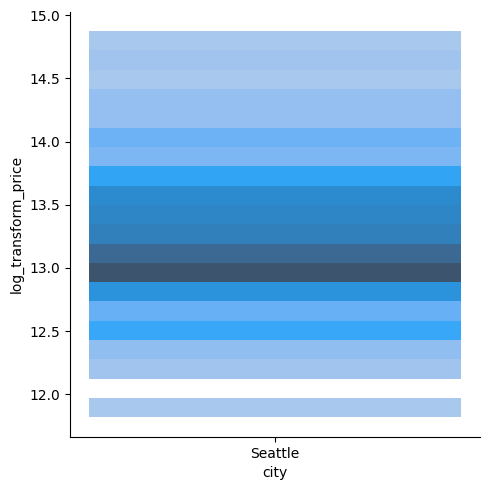

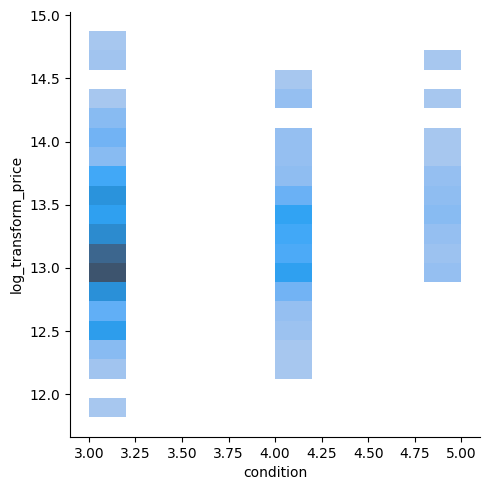

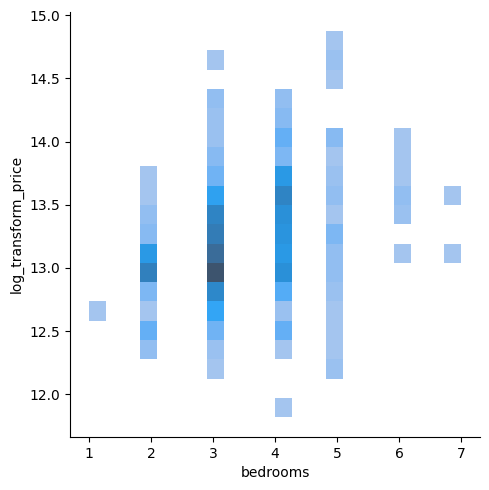

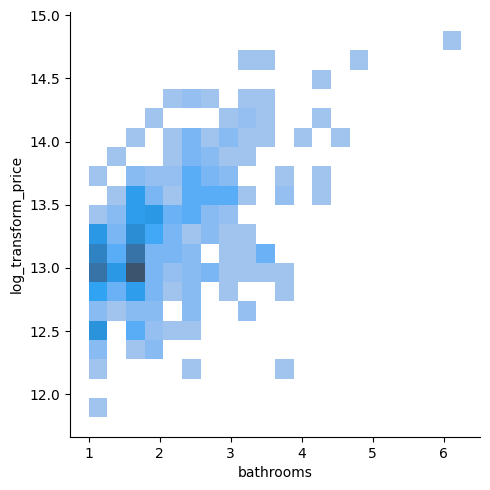

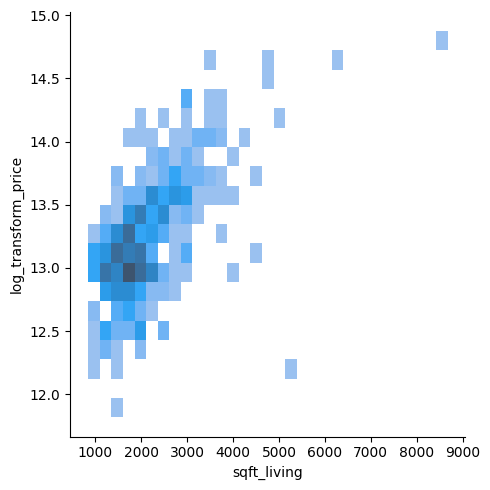

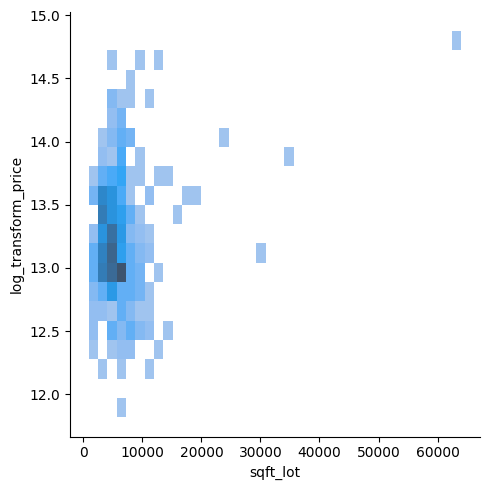

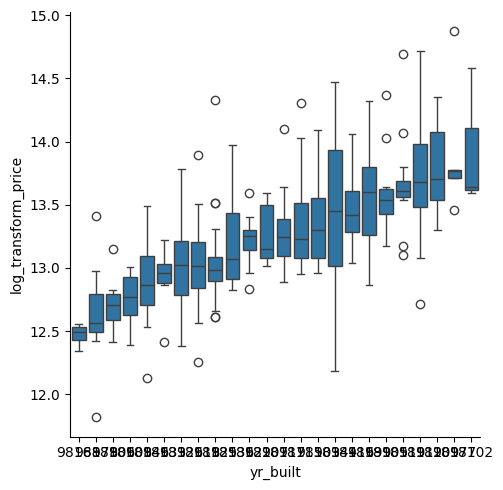

In [45]:
#lets graph these features to see if there's a linear trend
features = ['sqft_basement','sqft_above', 'waterfront', 'view', 'yr_renovated', 'street', 'country', 'city', 'condition','bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'yr_built']
for feature in features:
    sns.displot(
        data=df,
        x=feature,
        y='log_transform_price'
    )
#sort statezips by price to show linear trend with location
zip_order = (df.groupby('statezip')['log_transform_price'].mean().sort_values().index)
sns.boxplot(
    data=df,
    x='statezip',
    y = 'log_transform_price',
    order=zip_order
)



## 🔍 Insight

We can see the most biggest linear trends from:\
-Square foot lot\
-Square foot basement\
-Square foot above\
-Square foot living\
-Bedrooms\
-Bathrooms\
-Year Built\
-Statezip

I will use these to train the model as they a strong linear trend with the price.

In [46]:
#set x and y values
X = df[['sqft_lot','bedrooms', 'bathrooms', 'sqft_living', 'yr_built','sqft_basement', 'sqft_above', 'statezip']]
y = df['log_transform_price']

In [47]:
#import sklearn to train model
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [48]:
X_train, X_test, y_train, y_test =train_test_split(X, y, test_size=0.2, random_state=42)

In [49]:
lr = LinearRegression()
lr.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [50]:
print(lr.score(X_test, y_test))
print(lr.score(X_train, y_train))

0.38419522554003316
0.5006908458175825


In [51]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [52]:
y_pred= lr.predict(X_test)
print(mean_absolute_error(y_test, y_pred))
print(mean_squared_error(y_test, y_pred))
print(r2_score(y_test, y_pred))

0.21687559658246833
0.07919436981579814
0.38419522554003316


## 📊 Model Evaluation Summary

**Model:**
- **Features used:** `bedrooms`, `bathrooms`, `house sqft`, `lot sqft`
- **Mean Absolute Error (MAE):** 0.22 (log scale)
- **Mean Squared Error (MSE):** 0.08 (log scale)
- **R² Score:** 0.59

- The model explains about 59% of the variation in house prices, which is a reasonable baseline for a simple linear model for house prices.
- Key size-related features (bedrooms, bathrooms, square footage) are relevant and meaningful predictors.
- No signs of major data leaks or obvious bugs.

## 📌 Project Summary

In this project, I worked through a complete end-to-end workflow to understand and model Seattle housing prices:

- **Loaded the dataset** and performed an initial inspection.
- **Cleaned the data** by handling missing values, removing any duplicates, fixing data types for modeling, and addressing outliers to ensure a reliable dataset.
- **Analyzed the raw prices**, calculated descriptive statistics, and identified that the price distribution was right-skewed by calculating skewness and kurtosis.
- **Visualized the original price distribution** using a histogram and boxplot to clearly see the skewness and potential outliers.
- **Discussed the importance of normality** for linear regression, which relies on the assumption that residuals are normally distributed, justifying the need for a log transformation.
- **Applied a log transformation** to the `price` column to normalize the target variable.
- **Verified the transformed prices** by recalculating summary statistics, skewness, and kurtosis to demonstrate that the distribution was now closer to normal.
- **Visualized scatterplots** for each numerical feature (bedrooms, bathrooms, house sqft, lot sqft) against the log-transformed price to identify linear relationships.
- **Selected relevant features** that showed a clear linear correlation with the target variable.
- **Built and trained a linear regression model** using scikit-learn, reserving 20% of the data for testing.
- **Evaluated the model’s performance** using Mean Absolute Error (MAE), Mean Squared Error (MSE), and the R² score: MAE: 0.25, MSE: 0.12, R²: 0.59


This project demonstrates my ability to perform practical exploratory data analysis (EDA), apply appropriate data transformations, justify modeling choices, and interpret model performance with clear metrics and visualizations.

  


## 🔍 Next Steps

If I were to extend and improve this project further, I would focus on:

- **Encoding Categorical Variables:** Properly encode categorical data (e.g., neighborhoods, zip codes) using one-hot encoding or target encoding for better model performance.
- **Outlier Analysis:** Perform more robust outlier detection, especially on lot sizes or extreme prices, to reduce their impact on the model.
- **Try Non-Linear Models:** Experiment with more advanced models like Random Forest Regression, Gradient Boosting, or XGBoost to capture non-linear patterns that a simple linear regression might miss.
- **Cross-Validation:** Use cross-validation to better assess model performance and avoid overfitting.
- **Hyperparameter Tuning:** Tune model parameters systematically to improve predictive power.
- **Residual Analysis:** Analyze residuals in more detail to check for any patterns or violations of model assumptions.
- **Pipeline & Scaling:** Build a full modeling pipeline with scaling, encoding, and transformation steps to make the workflow reproducible and robust.
- **Compare Models:** Compare multiple models (linear and non-linear) side by side to pick the best-performing one for this dataset.
- **Communicate Insights:** Prepare clear visualizations and a concise report or dashboard to communicate findings to non-technical stakeholders.

This would help move the project beyond a baseline model and demonstrate deeper modeling skills and practical problem-solving.
